# LLTF Calibration

On July 25, 2023, I (Austin Lake) helped Evan Bray runs some test with Laser Line Tunable Filter (LTTF) in B34:C256
Using an optical spectrometer, were were doing measurements of the expected and observed wavelengths after transmission through the LLTF

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.integrate import quad, odeint, romberg
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join(os.path.abspath(""), "data_files")
assert(os.path.exists(data_dir))
file = "CGI LLTF calibration.xlsx"
file_path = os.path.join(data_dir, file)
excel_file = pd.ExcelFile(file_path)
runs = [pd.read_excel(excel_file, sheet_name) for sheet_name in excel_file.sheet_names]

In [3]:
runs[0].columns

Index(['Grating', 'Set Wavelength', 'Obs. Wavelength', 'FWHM (nm)', 'delta'], dtype='object')

In [5]:
def organize(fname, output_dir) -> None:
    """Organizes files in output directory

    Parameters
    ----------
    fname: str
        name of resulting zip file

    output_dir: str
        Directory in which to zip images

    Returns
    -------
    None
    """
    if not os.path.isdir("output"):
        os.mkdir("output")
    if fname[-4:] != ".zip":
        fname += ".zip"
    save_path = os.path.join(os.path.abspath(output_dir), fname)
    if os.path.isfile(save_path):
        os.system(f"rm -rf {save_path}")
    if os.path.isdir(save_path[:-4]):
        os.system(f"rm -rf {save_path[:-4]}")
    cmd = f"zip -m -D -q {save_path} *.png *.log *.txt"
    os.system(cmd)

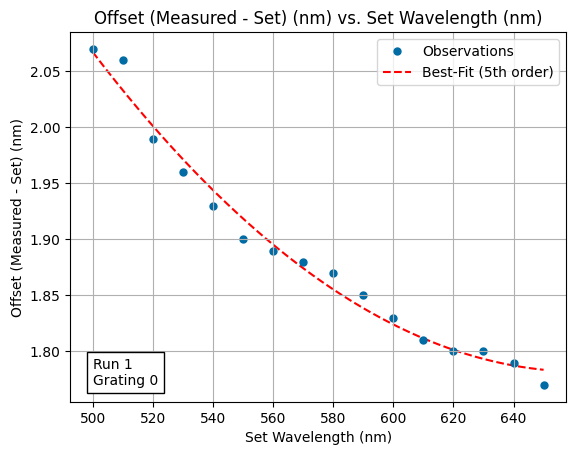

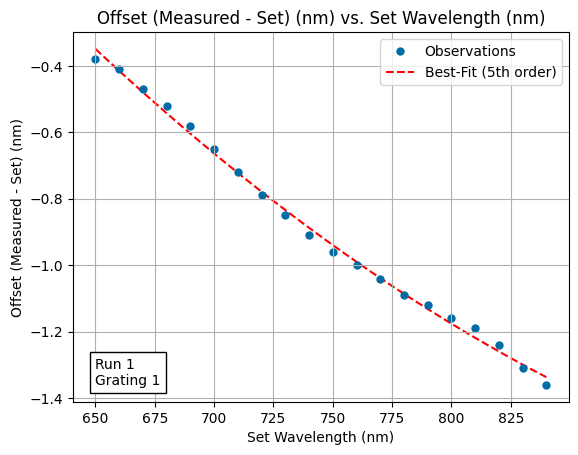

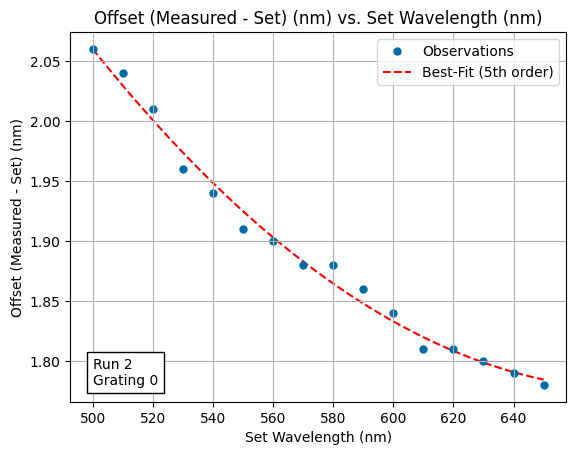

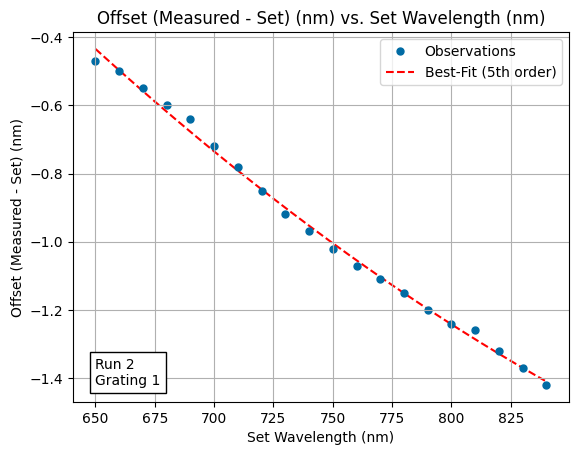

In [10]:
order = 5
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
smallest = 1e100
mpl.style.use("tableau-colorblind10")
coeff = np.empty((order+1, len(runs), 2))
for i, run in enumerate(runs):
        for j in range(2):
                fig, ax = plt.subplots()
                x, y = run[run["Grating"]==j]["Set Wavelength"], run[run["Grating"]==j]['delta']
                coeff[:,i,j] = np.polyfit(x, y, order)
                with open("equations.txt", "a") as f:
                        f.write(
f"y={coeff[:,i,j][0]:.2E}x⁵\
{'-' if coeff[:,i,j][1]<0 else '+'}{abs(coeff[:,i,j][1]):.2E}x⁴\
{'-' if coeff[:,i,j][2]<0 else '+'}{abs(coeff[:,i,j][2]):.2E}x³\
{'-' if coeff[:,i,j][3]<0 else '+'}{abs(coeff[:,i,j][3]):.2E}x²\
{'-' if coeff[:,i,j][4]<0 else '+'}{abs(coeff[:,i,j][4]):.2E}x\
{'-' if coeff[:,i,j][5]<0 else '+'}{abs(coeff[:,i,j][5]):.2E}\n"
)
                poly = np.poly1d(coeff[:,i,j])
                xx = np.linspace(x.min(), x.max(), 1000)
                ax.plot(x, y, "o", markersize=5, zorder=1, label="Observations")
                ax.plot(xx, np.poly1d(np.polyfit(x, y, 2))(xx), "r--",
                        label=f"Best-Fit ({ordinal(order)} order)", zorder=0)
                ax.set_title("Offset (Measured - Set) (nm) vs. Set Wavelength (nm)")
                ax.set_ylabel("Offset (Measured - Set) (nm)")
                ax.set_xlabel("Set Wavelength (nm)")
                ax.legend()
                run_num = f"Run {i+1}"
                grating_num = f"Grating {j}"
                text = "\n".join([run_num, grating_num])
                t = ax.text(x.min(),y.min(),text)
                t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
                ax.grid()
                plt.rcParams['axes.facecolor']='white'
                plt.rcParams['savefig.facecolor']='white'
                plt.rcParams['figure.facecolor'] = 'white'
                plt.savefig(f"run{i+1}_grating{j}.png")
                plt.show()
                plt.close(fig)

organize(f"LLTF_{ordinal(order)}_order_fit.zip", output_dir=os.path.join(data_dir, "..", "output"))

In [68]:
test1, test2 = np.zeros((33, 100, 2)), np.zeros((33, 100, 2))


In [69]:
assert(test1.shape == test2.shape)

In [91]:
from scipy.integrate import odeint, quad
import numpy as np

def test(a, b):
    return odeint(lambda y, x: np.square(x), a, b)

a = 0
b = np.linspace(1, 10, 10, dtype=int)

result = test(a, b).flatten()

def test2(a,b):
    return quad(lambda x: np.square(x), a, b)

result2 = np.empty_like(result)
for i, upper in enumerate(b):
    result[i] = test2(a, upper)[0]


In [95]:
import sys
import numpy as np
from desc_bpz.paths import *
import glob
import desc_bpz
from desc_bpz.bpz_tools_py3 import *
from desc_bpz.will_tools_py3 import *
from desc_bpz.coetools_py3 import pause, params_cl
from tqdm.auto import tqdm
from synphot import units, SourceSpectrum, SpectralElement, Observation
from synphot.models import Empirical1D
import astropy.units as u
from astropy.constants import h
from scipy.integrate import quad

In [92]:
print(result)

[3.33333333e-01 2.66666667e+00 9.00000000e+00 2.13333333e+01
 4.16666667e+01 7.20000000e+01 1.14333333e+02 1.70666667e+02
 2.43000000e+02 3.33333333e+02]


In [208]:
a = 50
b = 100
c = np.linspace(50, 100, 51)
d = np.array([c[:-1],c[1:]]).T
print(d)

[[ 50.  51.]
 [ 51.  52.]
 [ 52.  53.]
 [ 53.  54.]
 [ 54.  55.]
 [ 55.  56.]
 [ 56.  57.]
 [ 57.  58.]
 [ 58.  59.]
 [ 59.  60.]
 [ 60.  61.]
 [ 61.  62.]
 [ 62.  63.]
 [ 63.  64.]
 [ 64.  65.]
 [ 65.  66.]
 [ 66.  67.]
 [ 67.  68.]
 [ 68.  69.]
 [ 69.  70.]
 [ 70.  71.]
 [ 71.  72.]
 [ 72.  73.]
 [ 73.  74.]
 [ 74.  75.]
 [ 75.  76.]
 [ 76.  77.]
 [ 77.  78.]
 [ 78.  79.]
 [ 79.  80.]
 [ 80.  81.]
 [ 81.  82.]
 [ 82.  83.]
 [ 83.  84.]
 [ 84.  85.]
 [ 85.  86.]
 [ 86.  87.]
 [ 87.  88.]
 [ 88.  89.]
 [ 89.  90.]
 [ 90.  91.]
 [ 91.  92.]
 [ 92.  93.]
 [ 93.  94.]
 [ 94.  95.]
 [ 95.  96.]
 [ 96.  97.]
 [ 97.  98.]
 [ 98.  99.]
 [ 99. 100.]]


[  0.           2.33333337   8.6666667   21.00000004  41.33333337
  71.6666667  114.00000004 170.33333337 242.6666667  333.00000004]


In [203]:
class funky:
    def wave_to_freq(wavelengths: np.ndarray) -> np.ndarray:
        """Converts wavelengths in units of Angstroms into frequencies in units Hertz (Hz)

        Parameters
        ----------
        wavelenths : numpy.ndarray
            Wavelengths in units of Angstroms

        Returns
        -------
        frequencies : numpy.ndarray
            Frequencies in units of Hertz (Hz)
        
        """
        frequencies = (wavelengths*u.Angstrom).to(u.Hz, equivalencies=u.spectral()).value
        return frequencies

    def flux(transmission_profile: SpectralElement, a: float, b: float, z: float, sed: SourceSpectrum = None) -> float:
        """Calculates flux density through a filter with a given transmission profile and SED

        Parameters
        ----------
        transmission_profile : numpy.ndarray
            Transmission profile for a particular filter

        a : float
            Lower limit of integration
        
        b : float
            Upper limit of integration

        z : float

        sed : numpy.ndarray
            Spectral energy distribution of a galaxy from a rest frame
        
        Returns
        -------
        flux : float
            Flux through a filter

        error : float
            Error of flux density

        Notes
        -----
        Formula in use here is from Eric Switzer
        Transmission_profile and sed should have a shape of (2, n) and (2, m) respective where n is the number of transmission samples and m is the number of sed samples.
        """
        flux, error = quad(lambda f: np.interp(f, *transmission_profile) * (np.interp(f, sed[0]*(1+z), sed[1]/(1+z)**2) if sed is not None else 3631) / (h.value * f), a, b)
        return flux, error

    def load_filters() -> pd.DataFrame:
        """Loads filter transmission profiles

        Parameters
        ----------
        None

        Returns
        -------
        filters: pandas.DataFrame
            Filter transmission profiles as a function of wavelength
        """
        filters = pd.read_excel("https://roman.gsfc.nasa.gov/science/RRI/Roman_effarea_20210614.xlsx", skiprows=1)
        filters.columns = [column.strip() for column in filters.columns]
        if filters["Wave"][0] == 0:
            filters.drop(0, inplace=True)
        filters.drop(columns=["SNPrism", "Grism_1stOrder", "Grism_0thOrder"], inplace=True)
        filters["Wave"] *= 10000 # micron to angstrom conversion
        filters[filters.columns.drop("Wave")] /= np.pi * 1.2**2 # effective area to throughput conversion
        return filters

In [204]:
def main():
    """BPZ Model Algorithm

    Parameters
    ----------
    None

    Returns
    -------
    None
    """

    data_dir = os.path.join(os.path.abspath(""), "data_files")
    sed_dir = os.path.join(data_dir, "SED")
    ab_dir = os.path.join(data_dir, "AB")
    fil_dir = os.path.join(data_dir, "FILTER")
    set_data_dir(data_dir)
    # print(os.environ.get("BPZDATAPATH", None))
    filters = [filter_file[:-4] for filter_file in os.listdir(fil_dir) if "CWWSB4" not in filter_file]
    spectra = [sed_file[:-4] for sed_file in os.listdir(sed_dir) if "CWWSB4" not in sed_file]

    zmin = 0.005
    zmax = 3.505
    dz = 0.01
    z_range = np.linspace(start=zmin, stop=zmax+dz, num=int((zmax-zmin)/dz))
    
    nt=len(spectra)
    nz=len(z_range)
    nf=len(filters)

    #Get the model fluxes
    f_mod=np.empty((nz,nt,nf))
    f_obs=np.empty_like(f_mod)
    errors=np.empty_like(f_mod)

    filter_data = funky.load_filters()
    filter_data["Wave"] = funky.wave_to_freq(filter_data["Wave"].to_numpy())
    filter_data.rename(columns={"Wave": "Frequncy"}, inplace=True)
    for i, sed_file in enumerate(tqdm([sed_file for sed_file in os.listdir(sed_dir) if "CWWSB4" not in sed_file],
                    desc="Loading SED templates:",
                    disable=True, position=0)):
        galaxy_type = sed_file[:-4]
        sed = np.loadtxt(os.path.join(sed_dir, sed_file)).T # sed units: nJy vs Angstrom
        if sed[0][0] == 0:
            sed = sed[:,1:]
        sed[0], sed[1] = funky.wave_to_freq(sed[0]), sed[1]*1e-9 # sed units: Jy vs Hz
        for i, z in enumerate(tqdm(z_range, desc=f"Redshifts for {galaxy_type} Type Galaxy")):
            for k, (transmission_profile, a, b) in enumerate([(filter_data[["Frequncy", filter_id]].to_numpy().T, filter_data["Frequncy"][filter_data[filter_id]>0].min(),
                                                               filter_data["Frequncy"][filter_data[filter_id]>0].min()) for filter_id in filter_data.columns.drop("Frequncy")]):
                f_obs[i,j,k], errors[i,j,k] = funky.flux(transmission_profile, a, b, z=z, sed=sed)

    print(f_obs)

main()

Redshifts for SB3_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for Scd_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for Im_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for SB2_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for El_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for ssp_25Myr_z008 Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for ssp_5Myr_z008 Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

Redshifts for Sbc_B2004a Type Galaxy:   0%|          | 0/350 [00:00<?, ?it/s]

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [7.34785436e+14 7.32988895e+14 7.31201117e+14 ... 7.25889729e+14
   7.24136372e+14 7.22391465e+14]
  [7.20654947e+14 7.18926758e+14 7.17206837e+14 ... 7.12096100e+14
   7.10408668e+14 7.08729215e+14]
  ...
  [6.81346495e+14 6.79801492e+14 6.78263480e+14 ... 6.73690917e+14
   6.72180399e+14 6.70676640e+14]
  [6.69179594e+14 6.67689216e+14 6.66205462e+14 ... 6.61793506e+14
   6.60335811e+14 6.58884523e+14]
  [6.57439601e+14 6.56001002e+14 6.54568686e+14 ... 6.50309020e+14
   6.48901424e+14 6.47499909e+14]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [6.35153513e+14 6.33810693e+14 6.32473540e+14 ... 6.28495719e+14
   6.27180874e+14 6.25871520e+14]
  [6.24567621e+14 6.23269143e+14 6.21976054e+14 ... 6.18128779e+14
   6.16856909e+14 6.15590263e+14]
  ...
  [5.94826306e+14 5.93648432e+14 5.92475213e+14 ... 5.88983218e+14
   5.87828

In [205]:
num1, num2, num3 = 124395210788381.7, 161526108836206.88, 199928303656215.2
assert(num3>num1)
assert(num2>num3)


AssertionError: 